**Base de datos con los rankings de 1990 a 2019**

In [5]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Leer el archivo CSV
atp_data = pd.read_csv('ATP_Rankings_1990-2019.csv')

print(atp_data.head(5))
print(atp_data.dtypes)




         Date Gender     Type Ranking         Player Country  Age Points  \
0  1990-01-01    men  singles       1     Ivan Lendl     USA   29      0   
1  1990-01-01    men  singles       2   Boris Becker     GER   22      0   
2  1990-01-01    men  singles       3  Stefan Edberg     SWE   23      0   
3  1990-01-01    men  singles       4   Brad Gilbert     USA   28      0   
4  1990-01-01    men  singles       5   John McEnroe     USA   30      0   

   Tournaments  
0            0  
1            0  
2            0  
3            0  
4            0  
Date           object
Gender         object
Type           object
Ranking        object
Player         object
Country        object
Age             int64
Points         object
Tournaments     int64
dtype: object


**Borro las columnas que no tienen utilidad**

In [6]:
atp_data = atp_data.drop(['Points', 'Tournaments', 'Gender', 'Type'], axis=1)


**Contemplo que no faltan datos**

<AxesSubplot: >

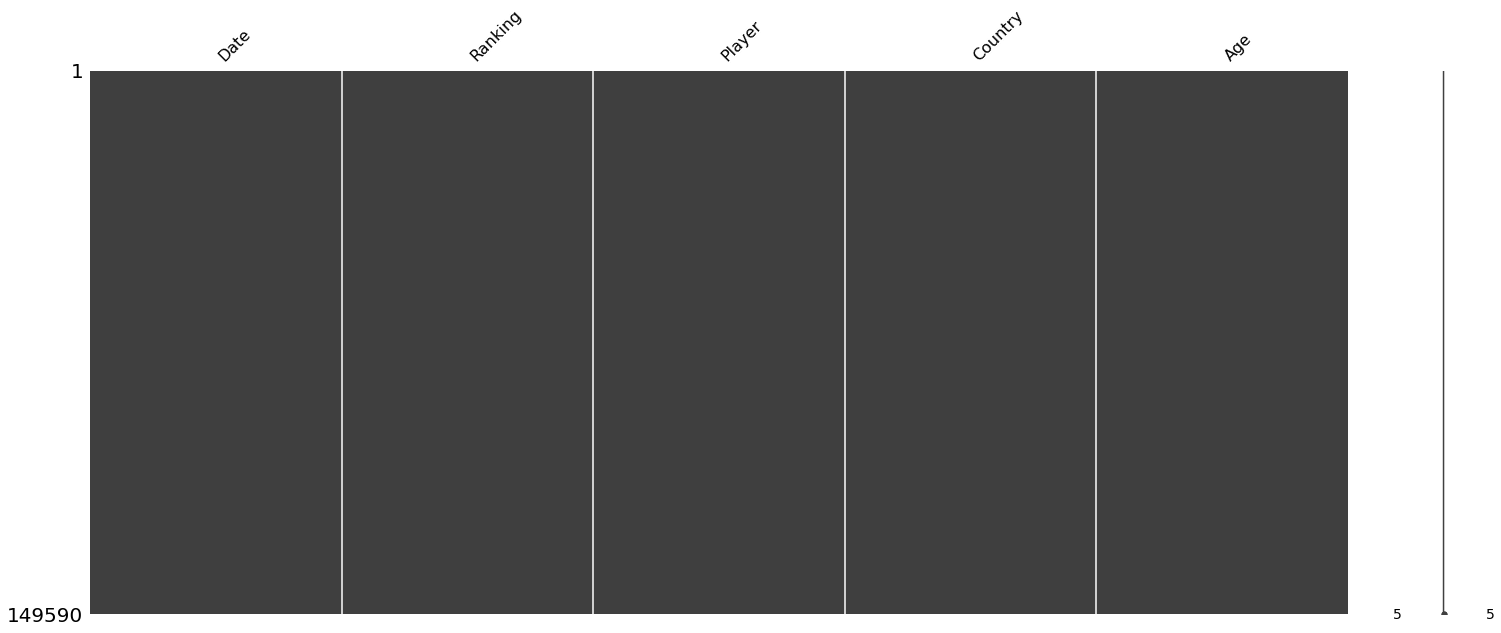

In [16]:
import missingno as msno
import warnings

# Cargar el DataFrame y generar la matriz de valores faltantes
msno.matrix(atp_data)







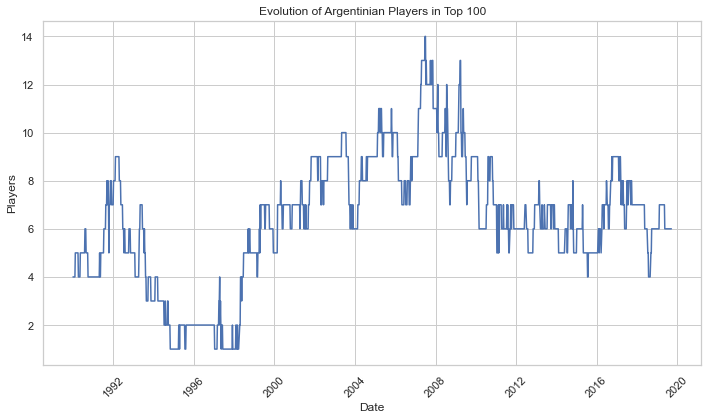

In [7]:


# Convertir columna de fechas a formato de fecha
atp_data['Date'] = pd.to_datetime(atp_data['Date'])

# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Contar el número de jugadores argentinos en el top 100 en cada fecha
num_argentinian_players = Argentina_data.groupby('Date')['Ranking'].count()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=num_argentinian_players.index, y=num_argentinian_players.values)
plt.title('Evolution of Argentinian Players in Top 100')
plt.xlabel('Date')
plt.ylabel('Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



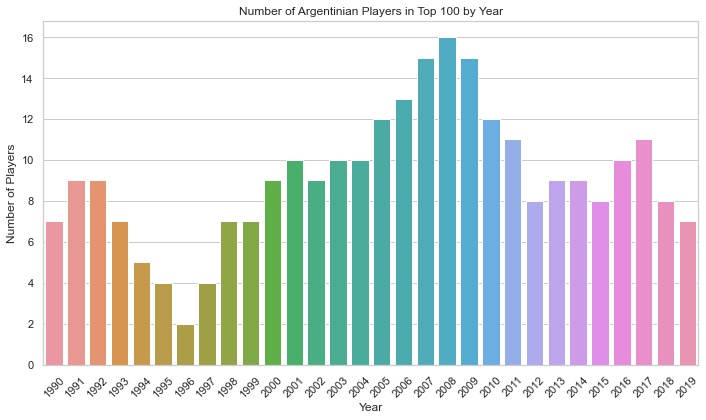

In [8]:

# Convertir columna de fechas a formato de fecha y extraer el año
atp_data['Date'] = pd.to_datetime(atp_data['Date'])
atp_data['Year'] = atp_data['Date'].dt.year

# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Contar el número de jugadores argentinos en el top 100 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].nunique()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=num_argentinian_players.index, y=num_argentinian_players.values)
plt.title('Number of Argentinian Players in Top 100 by Year')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [13]:


# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG'].copy()

# Agregar una columna con el año de cada fecha usando .loc[]
Argentina_data.loc[:, 'Year'] = Argentina_data['Date'].dt.year

# Contar el número de jugadores únicos en el top 100 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].agg(lambda x: ', '.join(x.unique())).reset_index()

# Formatear los datos en una tabla
table = tabulate(num_argentinian_players, headers='keys', tablefmt='pretty')

# Imprimir la tabla
print("Número de Jugadores Argentinos en el Top 100 por Año:")
print(table)


Número de Jugadores Argentinos en el Top 100 por Año:
+----+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Year |                                                                                                                                          Player                                                                                                                                           |
+----+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 0  | 1990 |                                       